# Part 3 
**Finally, take the following dataset (https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip), train on this dataset and provide test accuracy on the MNIST test set, using the same test split from part 2. Train using scratch random initialization and using the pretrained network part 1. Do the same analysis as 2 and report what happens this time. Try and do qualitative analysis of what's different in this dataset. Please save your model checkpoints.**

Get file into memory and unzip into folder

In [1]:
!wget -qq https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip

In [2]:
!unzip -qq mnistTask3.zip

Make required imports

In [3]:
from fastai import *
from fastai.vision import *
import warnings
warnings.filterwarnings('ignore')

Check number of images in each classes

In [4]:
all_classes = os.listdir('mnistTask')
print(len(all_classes))
for cls in all_classes:
  print(cls, len(os.listdir('mnistTask/'+cls)))

10
4 5914
8 6129
3 6037
5 6139
0 5980
2 6009
7 5954
1 5807
9 5994
6 6037


Check image size 

In [5]:
img = PIL.Image.open('mnistTask/8/image_020251.jpg')
img.size

(28, 28)

In [6]:
# check for another image
img = PIL.Image.open('mnistTask/8/image_025639.jpg')
img.size

(28, 28)

## Download MNIST

In [7]:
path = untar_data(URLs.MNIST, dest='.'); path

PosixPath('mnist_png')

## Create databunch with training set as mnistTask and test data from MNIST as validation set

In [8]:
!mkdir data

In [10]:
!cp -R mnist_png/testing data/testing

In [11]:
!cp -R mnistTask data/mnistTask

In [14]:
img_size = 28
batch_size = 512
data = ImageDataBunch.from_folder('data',
                                  train='mnistTask', 
                                  valid='testing',
                                  ds_tfms=get_transforms(do_flip=False),
                                  size=img_size,
                                  bs=batch_size).normalize()

In [15]:
data

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
4,4,4,4,4
Path: data;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
4,4,4,4,4
Path: data;

Test: None

Take a look at a batch

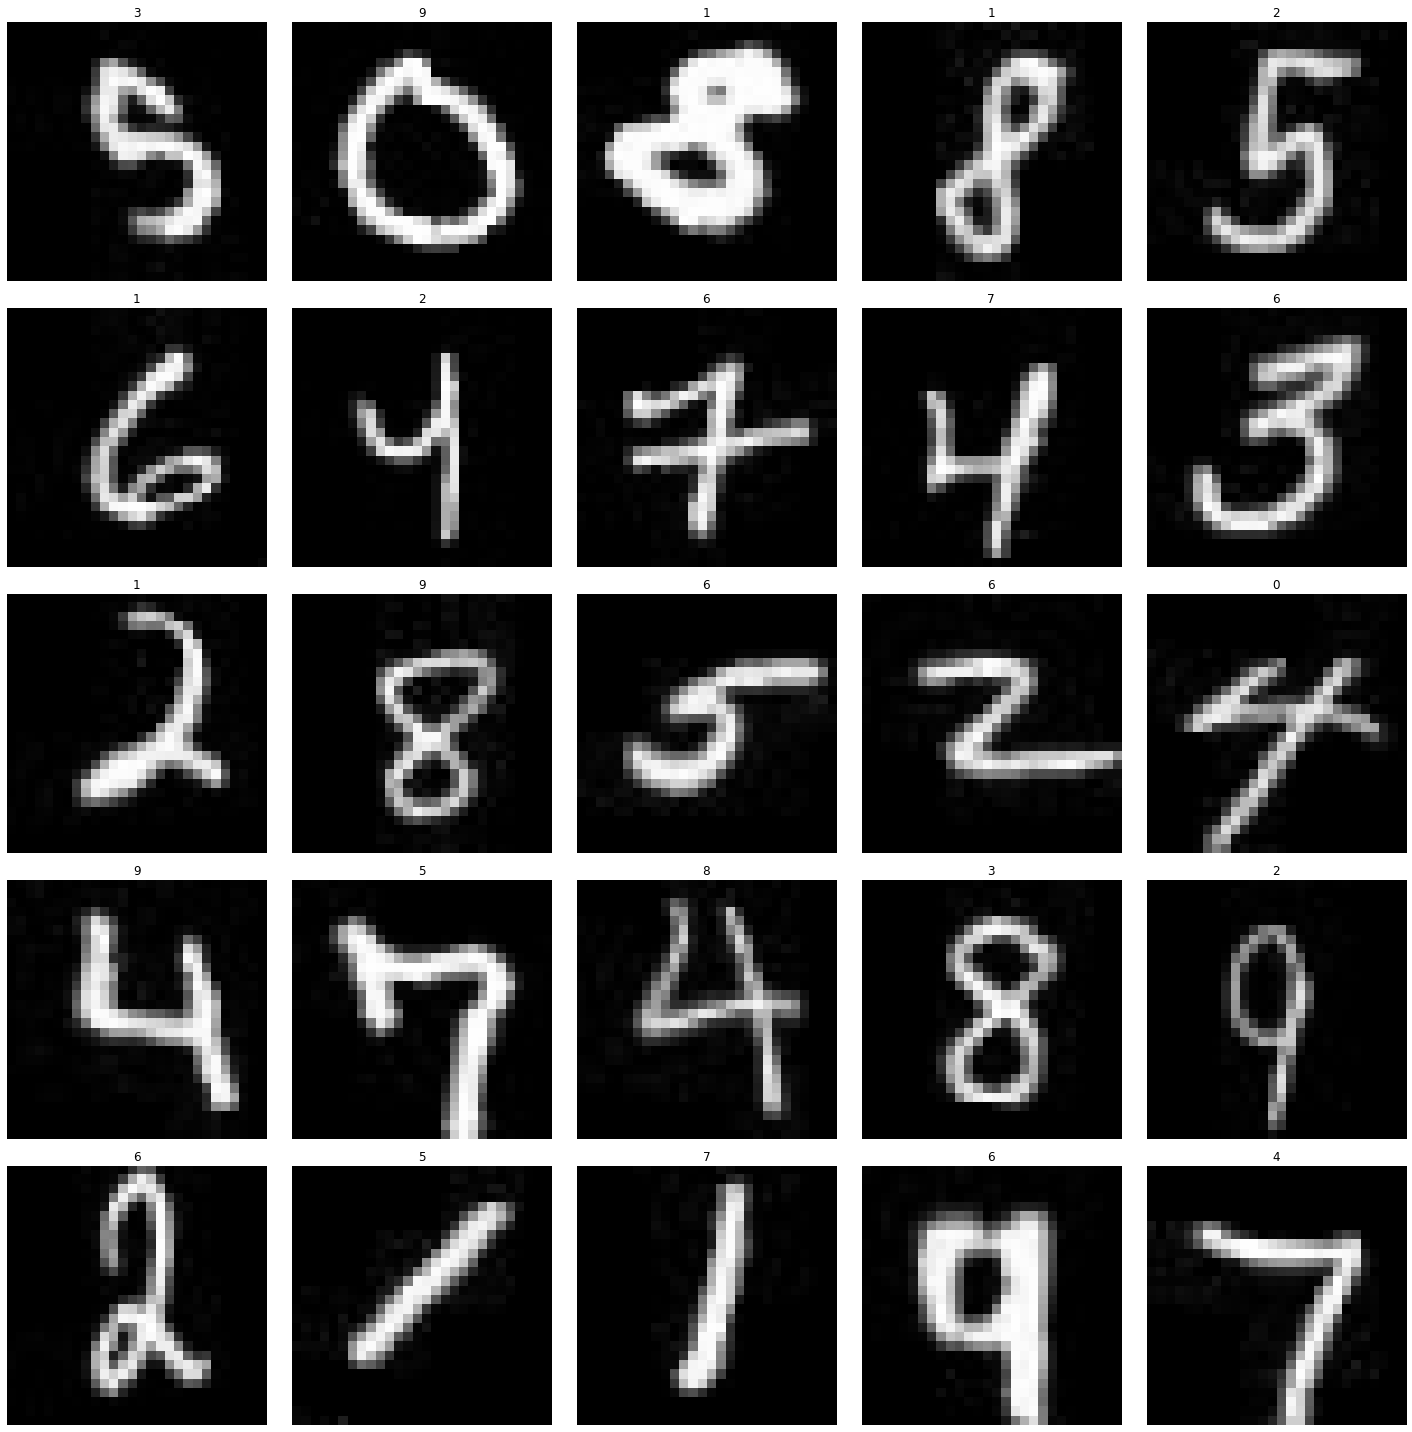

In [16]:
data.show_batch()

## Train using random initialization

### Try simple ConvNet

In [30]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [31]:
model = nn.Sequential(
    conv(3, 8), 
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), 
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), 
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), 
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), 
    nn.BatchNorm2d(10),
    Flatten()     
)

In [32]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [33]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          224        True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

- Analyze learning rate vs loss

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.89E-03
Min loss divided by 10: 3.63E-01


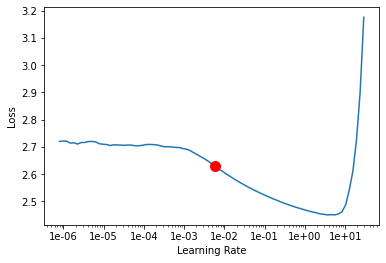

In [34]:
learn.lr_find(end_lr=100)
learn.recorder.plot(suggestion=True)

Train using one cycle policy for 10 epochs with max_lr=4e-1

In [35]:
learn.fit_one_cycle(10, max_lr=4e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.294482,2.991970,0.004900,00:59
1,2.291559,3.313722,0.009400,01:01
2,2.290051,3.881930,0.002100,01:00
3,2.280315,4.045524,0.003700,00:59
4,2.274380,3.505319,0.006800,00:59
5,2.265157,4.122516,0.001800,00:59
6,2.253876,4.345623,0.004200,00:59
7,2.248549,4.795097,0.001000,01:01
8,2.238681,5.105618,0.001200,00:59
9,2.233102,5.401516,0.003100,00:59


Plot progress

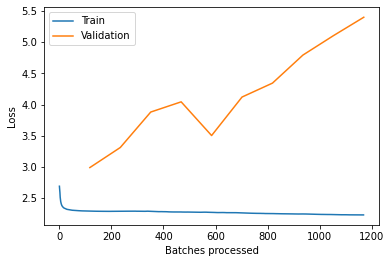

In [36]:
learn.recorder.plot_losses()

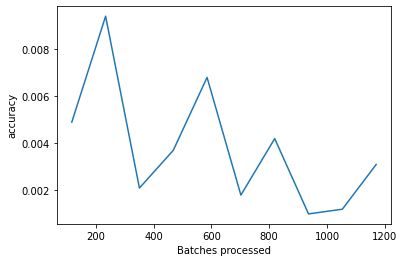

In [37]:
learn.recorder.plot_metrics()

Save model

In [38]:
learn.save('/content/drive/My Drive/MIDAS Task 2/p3-simple-cnn')

### Try without One Cycle Policy

In [45]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

Train with learning rate 4e-1 for 10 epochs 

In [46]:
learn.fit(10, 4e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.271870,4.488167,0.026900,00:58
1,2.267607,4.065422,0.003100,01:00
2,2.265558,4.499259,0.006100,00:58
3,2.264891,4.315571,0.011200,00:57
4,2.260883,4.349373,0.019700,00:57
5,2.266223,3.627120,0.096800,00:57
6,2.263152,4.008162,0.004200,00:57
7,2.263071,4.062980,0.076900,01:00
8,2.263872,5.087217,0.001800,00:58
9,2.267028,3.721398,0.009900,00:58


Plot progress

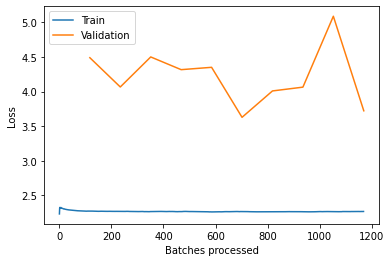

In [47]:
learn.recorder.plot_losses()

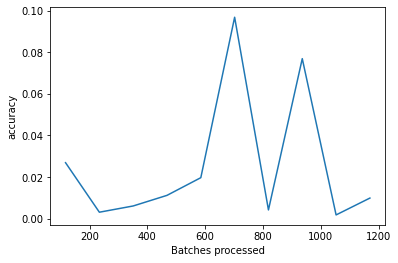

In [48]:
learn.recorder.plot_metrics()

In [49]:
learn.save('/content/drive/My Drive/MIDAS Task 2/p3-simple-cnn-fit')

### Try ResNet18 with random initialization

In [39]:
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 5.75E-03


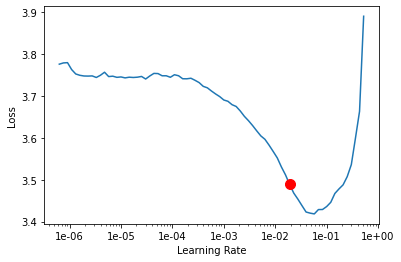

In [40]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [41]:
learn.fit_one_cycle(10, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.633077,5.409029,0.049100,01:03
1,2.541256,8.766854,0.118800,01:04
2,2.451129,2.380141,0.052700,01:02
3,2.344543,2.442511,0.037000,01:02
4,2.308655,2.646979,0.017900,01:02
5,2.297464,2.812164,0.018900,01:03
6,2.281420,3.430558,0.002300,01:03
7,2.264986,3.692210,0.001800,01:03
8,2.246106,4.316649,0.000500,01:02
9,2.237028,4.381697,0.000700,01:02


Plot progress

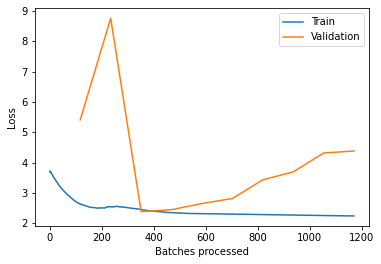

In [42]:
learn.recorder.plot_losses()

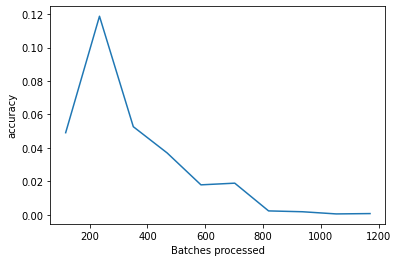

In [43]:
learn.recorder.plot_metrics()

In [44]:
learn.save('/content/drive/My Drive/MIDAS Task 2/p3-rn18-scratch')

## Use pretrained models

### Use pretrained weights from part 2 a)

In [50]:
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)

In [53]:
learn.load('/content/drive/My Drive/MIDAS Task 2/part2-0-9-224-s2');

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-03
Min loss divided by 10: 3.63E-02


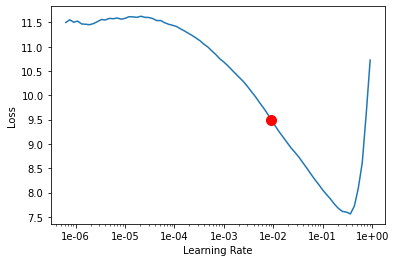

In [54]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [55]:
learn.fit_one_cycle(10, 4e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.347043,2.367664,0.090800,01:01
1,2.482992,2.344141,0.072300,01:03
2,2.340126,2.408808,0.100000,01:02
3,2.325892,2.601829,0.011000,01:01
4,2.317021,2.782573,0.021100,01:01
5,2.310187,2.808916,0.031300,01:01
6,2.289933,3.346010,0.004200,01:01
7,2.268305,4.180696,0.001400,01:03
8,2.253332,4.086109,0.001000,01:02
9,2.241721,4.338488,0.000300,01:01


Plot progress 

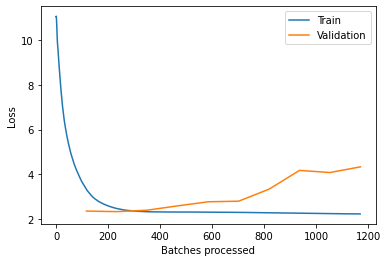

In [56]:
learn.recorder.plot_losses()

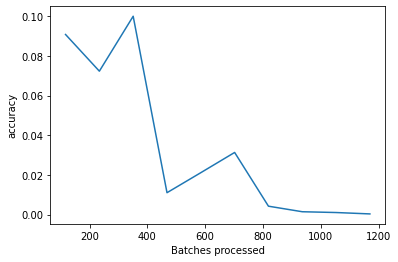

In [57]:
learn.recorder.plot_metrics()

In [58]:
learn.save('/content/drive/My Drive/MIDAS Task 2/p3-rn18-pretrained')

### Use pretrained weights from part 2 b)

In [59]:
learn.load('/content/drive/My Drive/MIDAS Task 2/part2-mnist-from-pretrained');

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 3.02E-02


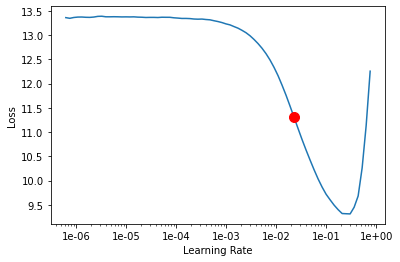

In [60]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [61]:
learn.fit_one_cycle(10, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.489900,3.792064,0.000500,01:01
1,2.388224,3.736101,0.000300,01:01
2,2.279371,3.955570,0.000000,01:01
3,2.265072,4.114553,0.000100,01:00
4,2.258043,4.544262,0.000100,01:02
5,2.253194,4.618903,0.000400,01:02
6,2.237479,5.063393,0.000100,01:01
7,2.228899,5.450654,0.000600,01:01
8,2.219543,5.800489,0.000000,01:01
9,2.214361,5.818210,0.000000,01:02


Plot progress

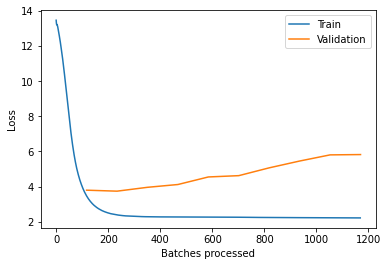

In [62]:
learn.recorder.plot_losses()

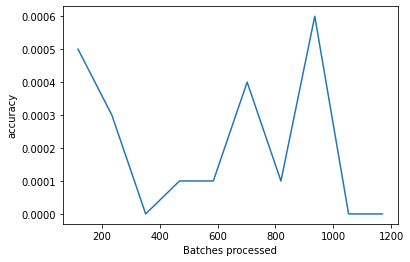

In [63]:
learn.recorder.plot_metrics()

In [64]:
learn.save('/content/drive/My Drive/MIDAS Task 2/p3-rn18-pretrained-2b')

## Data Inspection for noisy labels
- No model seems to give test accuracy above 10% 
- The data seems to have highly noisy labels as seen in the data batch shown above
- Do further analysis to check whether all classes have the same problem 

In [18]:
img_paths = []
for name in all_classes:
    path = 'mnistTask/'+ name
    img_paths.extend([os.path.join(path, image) for image in os.listdir(path)])

df = pd.DataFrame({'image': img_paths})
df['label'] = df['image'].apply(lambda x: x.split('/')[-2])

df.head()

,image,label
0,mnistTask/4/image_044548.jpg,4
1,mnistTask/4/image_002442.jpg,4
2,mnistTask/4/image_007931.jpg,4
3,mnistTask/4/image_048121.jpg,4
4,mnistTask/4/image_025016.jpg,4


In [19]:
def show_img(im, label, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, cmap='gray')
    ax.set_title(label)
    ax.axis('off')
    return ax

def show_imgs(ims, labels, cols, figsize=(20, 20)):
    fig,axes = plt.subplots(len(ims)//cols, cols, figsize=figsize)
    for i,ax in enumerate(axes.flat): 
        ax.set_xticks([]); ax.set_yticks([])
        show_img(ims[i], labels[i], ax=ax)
    plt.tight_layout()

Check for class 1

In [25]:
images = list(df[df['label']=='1']['image'])
labels = list(df[df['label']=='1']['label'])

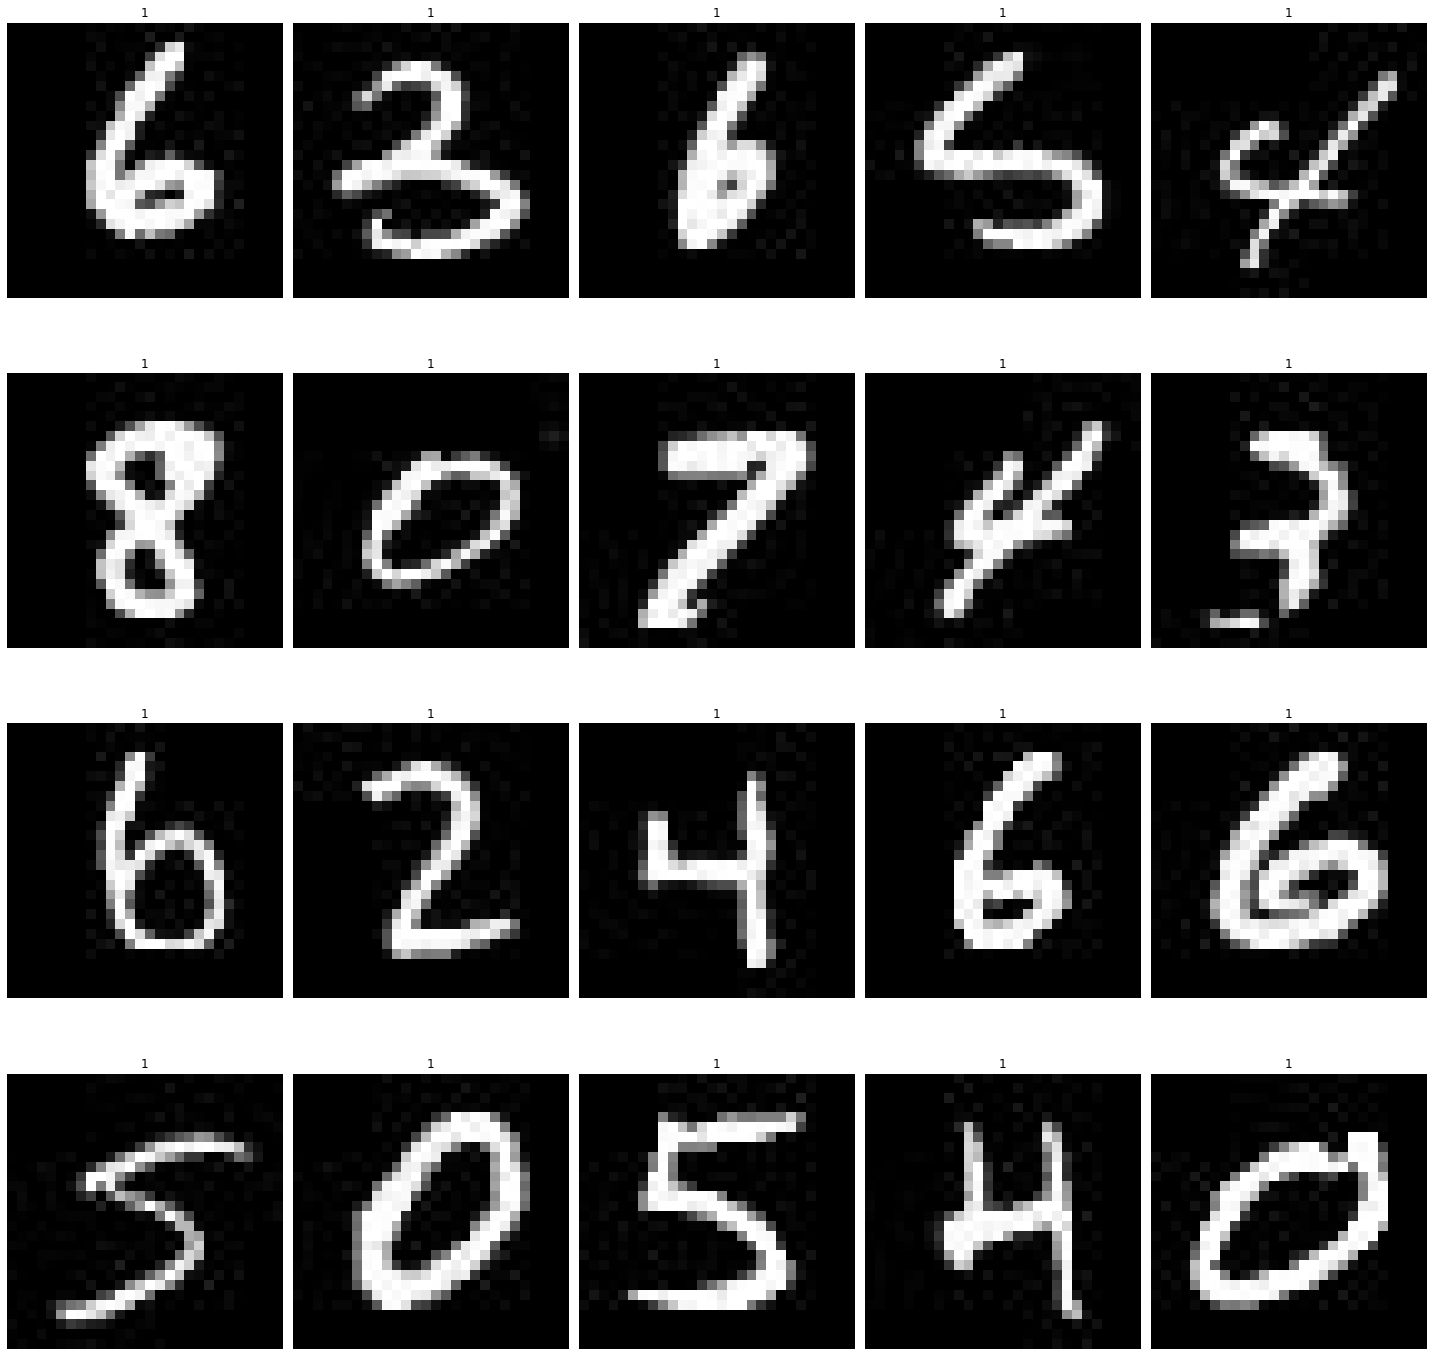

In [26]:
show_imgs([PIL.Image.open(images[i]) for i in range(len(images[:20]))], labels[:20], 5)

Class 3

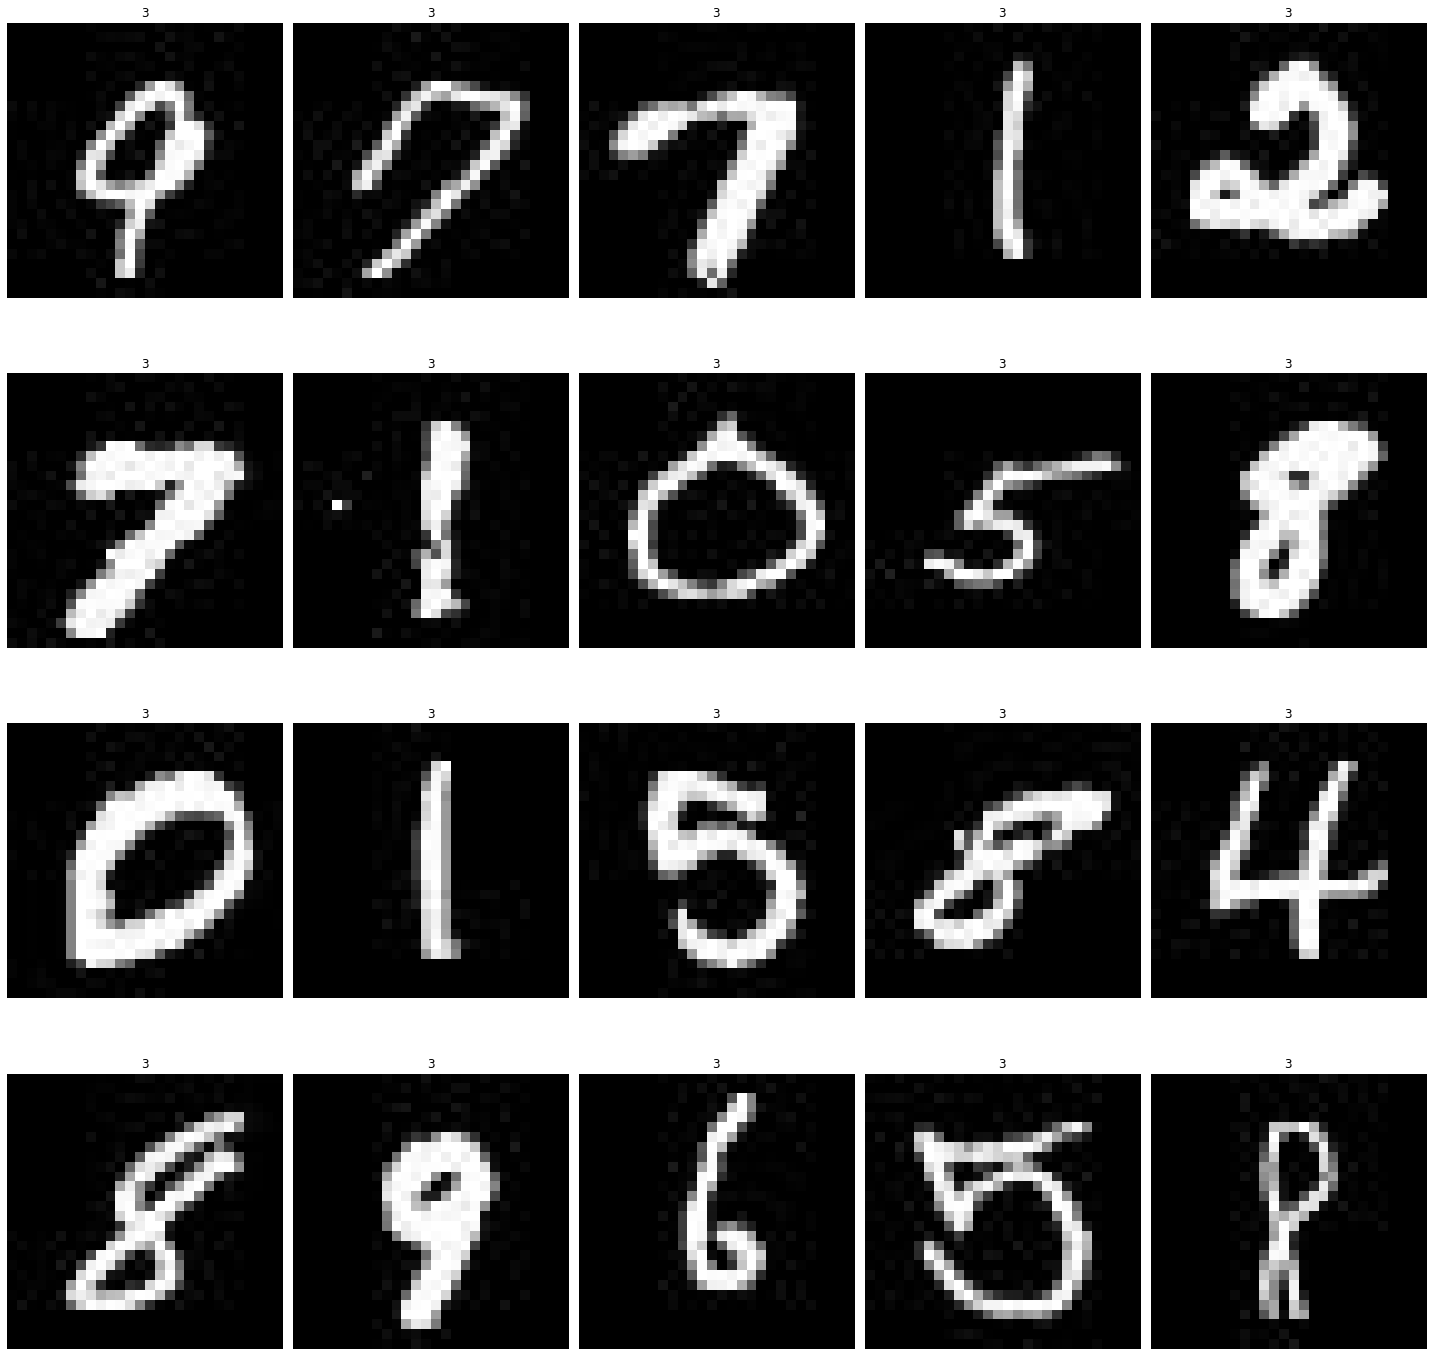

In [27]:
images = list(df[df['label']=='3']['image'])
labels = list(df[df['label']=='3']['label'])
show_imgs([PIL.Image.open(images[i]) for i in range(len(images[:20]))], labels[:20], 5)

Class 7

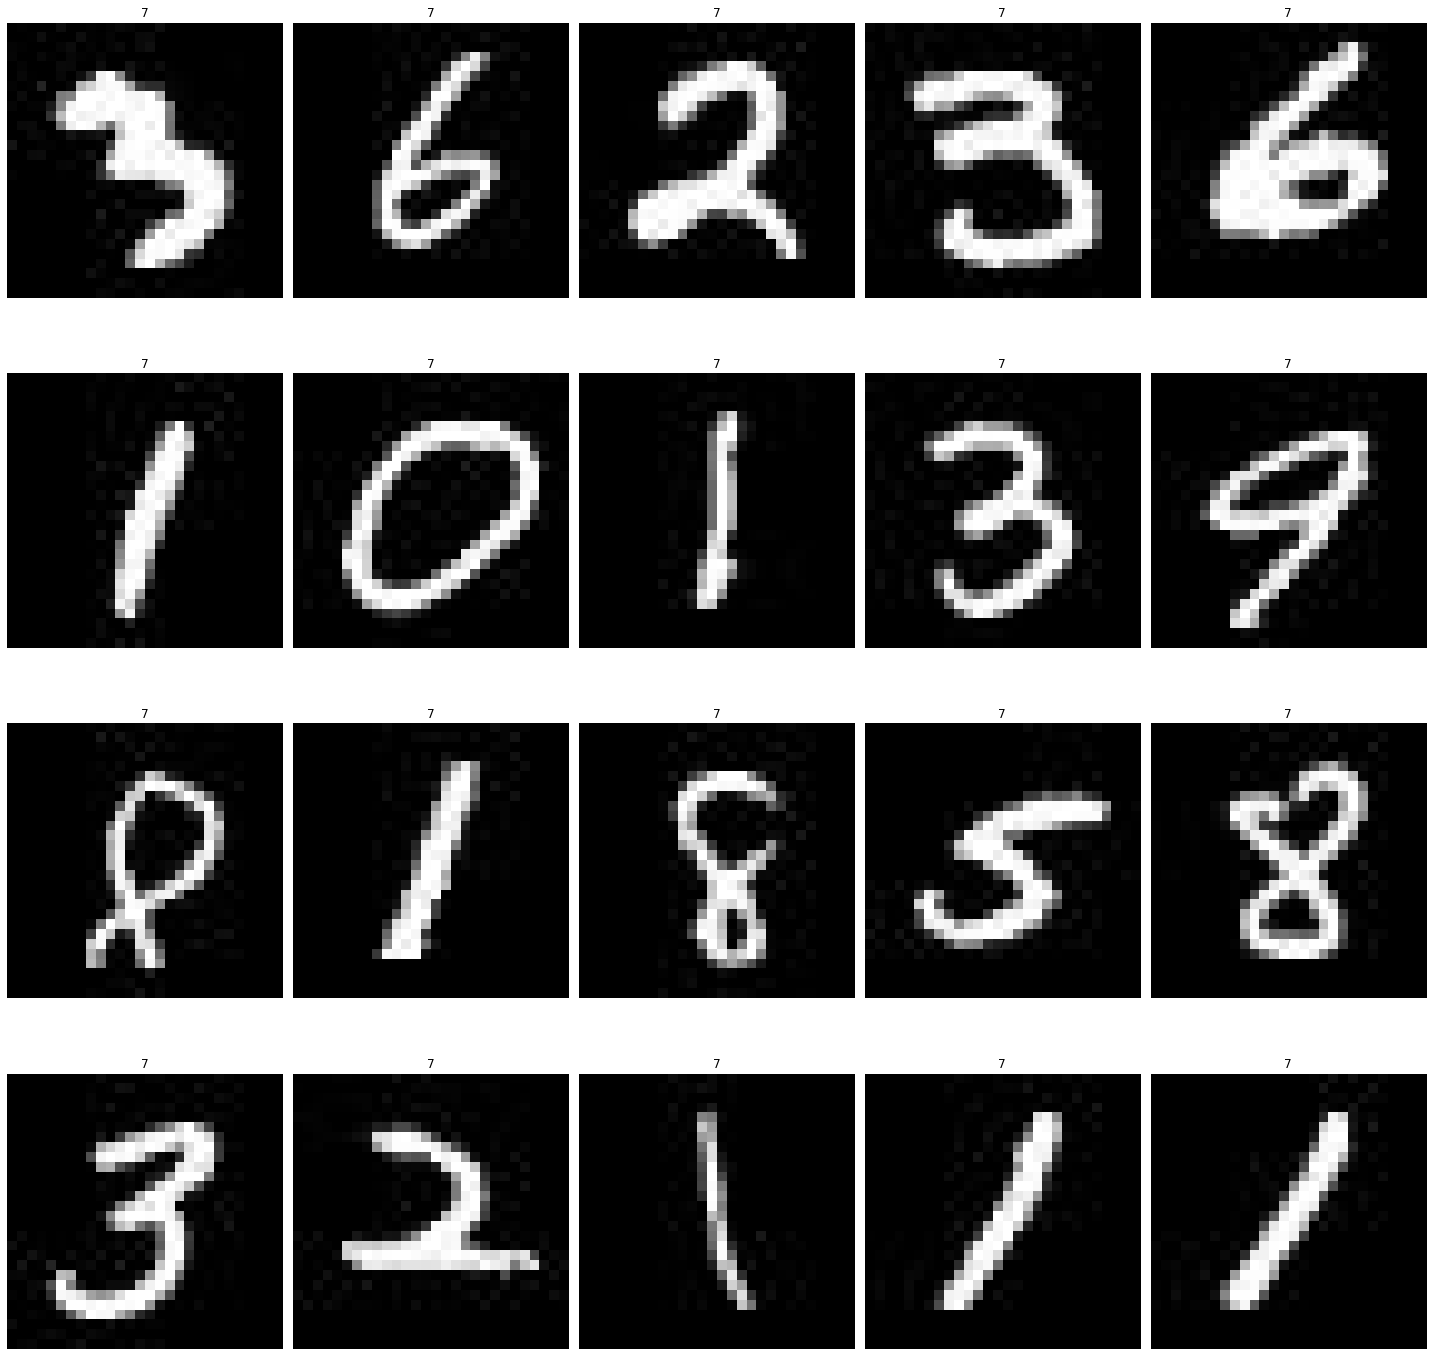

In [28]:
images = list(df[df['label']=='7']['image'])
labels = list(df[df['label']=='7']['label'])
show_imgs([PIL.Image.open(images[i]) for i in range(len(images[:20]))], labels[:20], 5)

Class 8

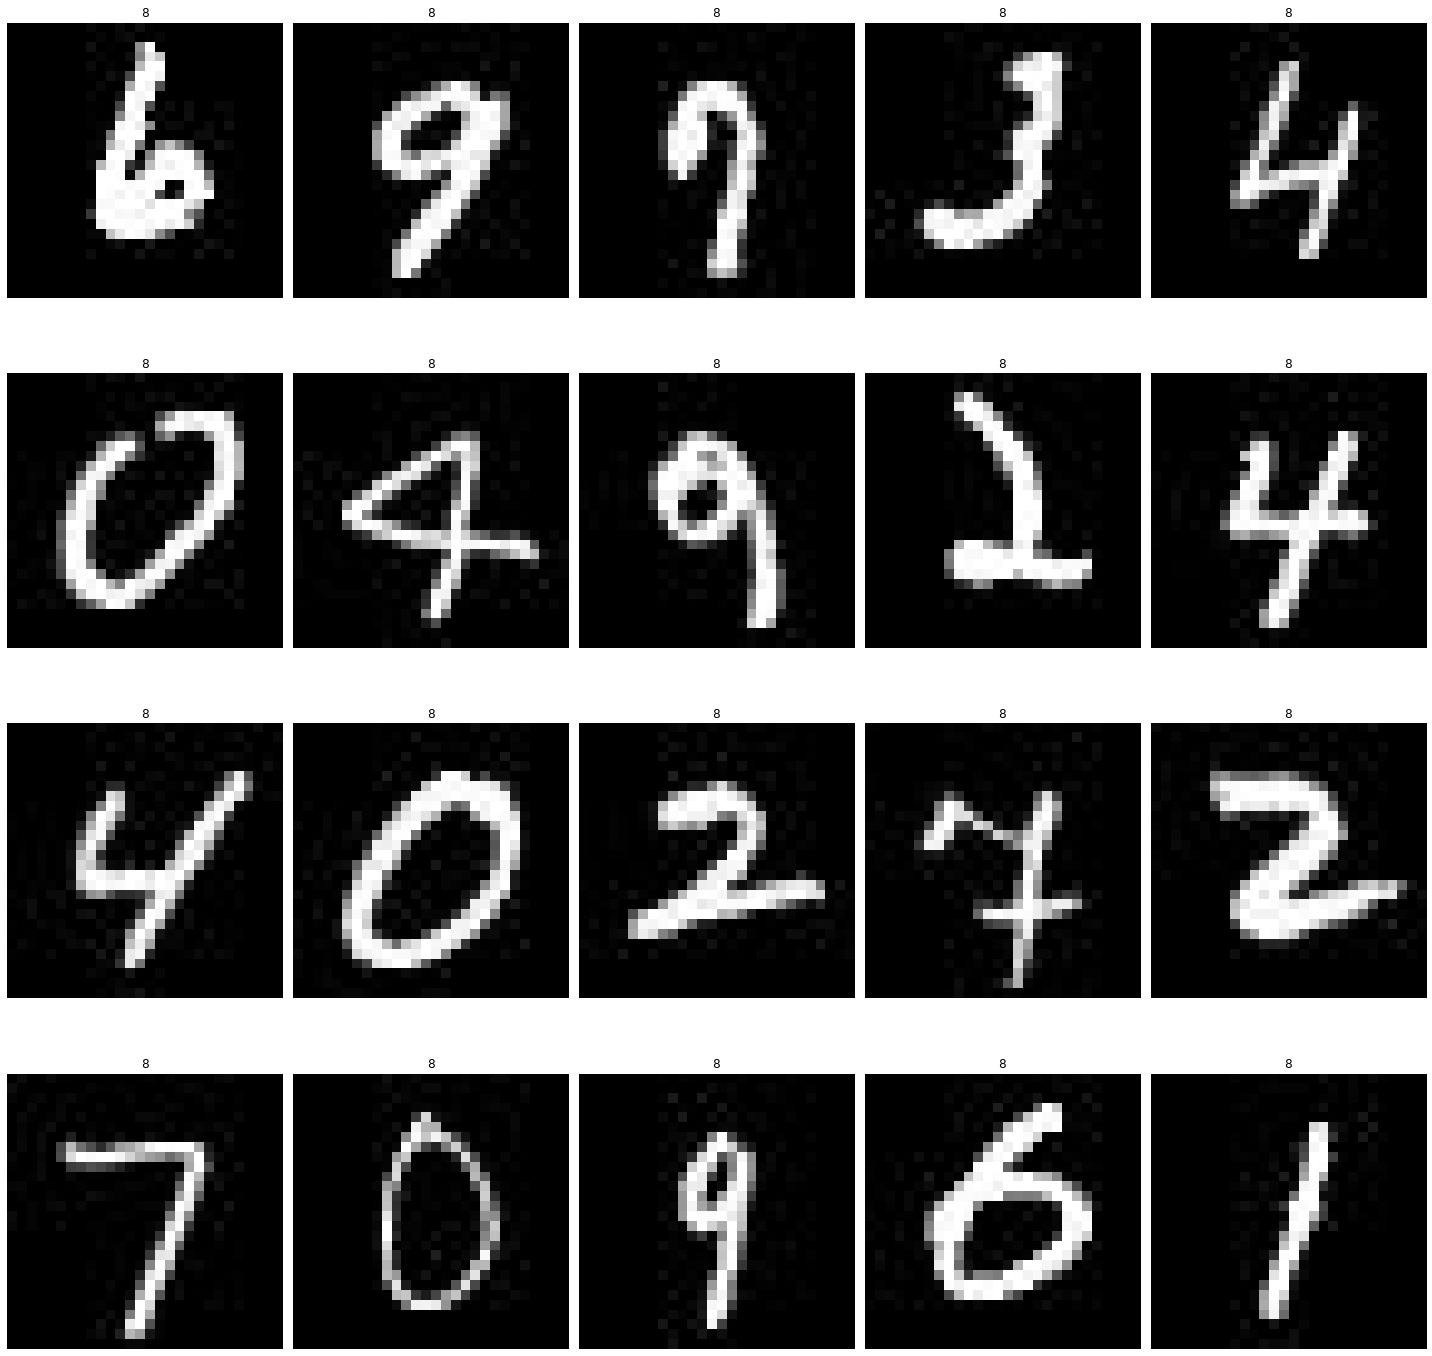

In [29]:
images = list(df[df['label']=='8']['image'])
labels = list(df[df['label']=='8']['label'])
show_imgs([PIL.Image.open(images[i]) for i in range(len(images[:20]))], labels[:20], 5)

- **We can conclude that the whole dataset consists of images with incorrect labels**